In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-8])

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [18]:
from ACME.ACME import ACME
import numpy as np
import pandas as pd

In [19]:
mean = [5,5,5,5,5,5]
cov = np.identity(6)
x_normal = pd.DataFrame(np.random.multivariate_normal(mean, cov, 5000), columns = ['f'+str(i) for i in range(1,7)] )
x_normal['is_out'] = 0

In [20]:
mean = [5,5,5,5,5,20]
cov = np.identity(6)
x_outliers = pd.DataFrame(np.random.multivariate_normal(mean, cov, 200), columns = ['f'+str(i) for i in range(1,7)] )
x_outliers['is_out'] = 1

In [21]:
X = pd.concat([x_normal,x_outliers],ignore_index=True, sort=False).reset_index(drop=True)

In [22]:
X.head(3)

,f1,f2,f3,f4,f5,f6,is_out
0,3.632322,7.211169,3.564981,6.028682,4.710859,4.933121,0
1,5.868163,4.071957,3.190125,5.047679,5.168252,6.260154,0
2,4.531588,6.207441,5.181407,4.783524,5.958591,4.034849,0


In [23]:
features = ['f'+str(i) for i in range(1,7)]

In [24]:
from sklearn.ensemble import IsolationForest
if_model = IsolationForest(random_state=0).fit(X[features])

In [25]:
X['pred_AD_score'] = -1*if_model.decision_function(X[features])

<AxesSubplot:ylabel='Frequency'>

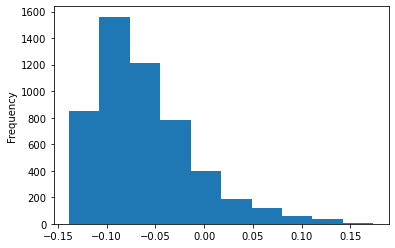

In [26]:
X['pred_AD_score'].plot(kind='hist')

In [47]:
k = 50
def score_function(model, data):
    try: # for global
        df = model.decision_function(data)
    except: # for local
        df = model.decision_function(data.reshape(1,-1))
    return -1*df

acme_ifo = ACME(if_model, 'AD_score', K=k, task='regression', score_function=score_function, features=features)
acme_ifo = acme_ifo.fit(X[features], robust = True)

In [48]:
acme_local = acme_ifo.fit_local(X[features], 0)

In [49]:
acme_local.anomaly_detection_importance()

,AD importance score,Min,Max
f3,0.117735,-0.012672,0.105063
f2,0.102464,-0.061455,0.041009
f1,0.101472,-0.014974,0.086499
f4,0.095013,-0.006373,0.088639


In [50]:
acme_local.anomaly_detection_feature_exploration_plot('f3')

In [51]:
acme_local.anomaly_detection_feature_exploration_plot('f2')

In [52]:
acme_local.anomaly_detection_feature_exploration_table('f2')

,effect,predictions,mean_prediction,original,quantile,Importance,local_quantile,direction
f2,0.000005,0.021959,0.021964,1.300473,0.000000,0.025238,0.979592,anomalies
f2,0.015997,0.005967,0.021964,2.880216,0.020408,0.025238,0.979592,anomalies
f2,-0.029372,-0.007407,0.021964,3.198346,0.040816,0.025238,0.979592,normal
f2,-0.037235,-0.015271,0.021964,3.422059,0.061224,0.025238,0.979592,normal
f2,-0.047980,-0.026016,0.021964,3.563065,0.081633,0.025238,0.979592,normal
f2,-0.050089,-0.028125,0.021964,3.712752,0.102041,0.025238,0.979592,normal
f2,-0.058261,-0.036297,0.021964,3.831593,0.122449,0.025238,0.979592,normal
f2,-0.062778,-0.040813,0.021964,3.940105,0.142857,0.025238,0.979592,normal
f2,-0.068094,-0.046130,0.021964,4.018522,0.163265,0.025238,0.979592,normal
f2,-0.074698,-0.052734,0.021964,4.093685,0.183673,0.025238,0.979592,normal


In [55]:
acme_local = acme_ifo.fit_local(X[features], 4500)

In [56]:
acme_local.anomaly_detection_importance()

,AD importance score,Min,Max
f6,0.178379,-0.077672,0.100707
f3,0.108747,-0.076080,0.032668
f1,0.103460,-0.052372,0.051088
f2,0.095886,-0.060196,0.035689
f4,0.095863,-0.047564,0.048299
f5,0.077376,-0.071671,0.005705


In [ ]:
acme_local.anomaly_detection_feature_exploration_table('f6')